In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 1) Load Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values (0-255 -> 0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 2) Split Validation Set from Training Set
# Reserve last 5000 samples for validation
x_val = x_train[-5000:]
y_val = y_train[-5000:]

x_tr = x_train[:-5000]
y_tr = y_train[:-5000]
print("Train shape:", x_tr.shape)
print("Validation shape:", x_val.shape)
print("Test shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (55000, 28, 28)
Validation shape: (5000, 28, 28)
Test shape: (10000, 28, 28)


In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting: range (0.1 , 0.5)
    keras.layers.Dense(10, activation="softmax")
])


model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# 5) Train with Validation Set
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8628 - loss: 0.4698 - val_accuracy: 0.9698 - val_loss: 0.1133
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9577 - loss: 0.1416 - val_accuracy: 0.9752 - val_loss: 0.0868
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9702 - loss: 0.0964 - val_accuracy: 0.9782 - val_loss: 0.0821
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9776 - loss: 0.0725 - val_accuracy: 0.9798 - val_loss: 0.0744
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9821 - loss: 0.0593 - val_accuracy: 0.9818 - val_loss: 0.0745
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9859 - loss: 0.0493 - val_accuracy: 0.9784 - val_loss: 0.0817
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9876 - loss: 0.0408 - val_accuracy: 0.9822 - val_loss: 0.0697
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9887 - loss: 0.0363 -

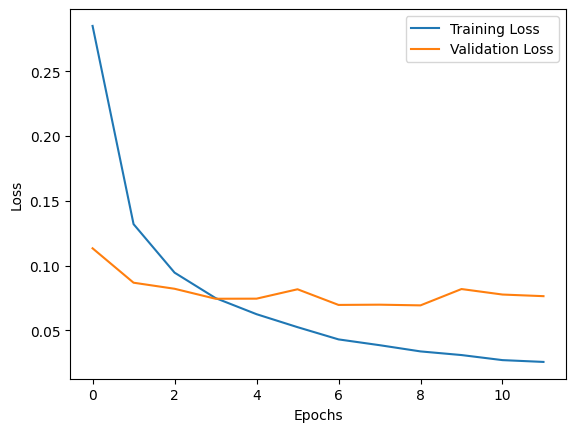

In [5]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
print("Final evaluation on test data:")
model.evaluate(x_test, y_test)

Final evaluation on test data:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9734 - loss: 0.0899


[0.07414337247610092, 0.978600025177002]

### **Task 1 — Deep Prediction Analysis**

In [7]:
sample = x_test[731].reshape(1, 28, 28)
pred = model.predict(sample)
print("Predicted Label:", np.argmax(pred))
print("True Label:", y_test[731])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted Label: 2
True Label: 2


In [8]:
sample1 = x_test[25].reshape(1, 28, 28)
pred1 = model.predict(sample1)
print("Predicted Label:", np.argmax(pred1))
print("True Label:", y_test[25])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Label: 0
True Label: 0


In [9]:
sample2 = x_test[12].reshape(1, 28, 28)
pred2 = model.predict(sample2)
print("Predicted Label:", np.argmax(pred2))
print("True Label:", y_test[12])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Label: 9
True Label: 9


In [10]:
sample3 = x_test[900].reshape(1, 28, 28)
pred3 = model.predict(sample3)
print("Predicted Label:", np.argmax(pred3))
print("True Label:", y_test[900])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Label: 1
True Label: 1


### **Task 2 — Custom Image Generalization Test**



In [11]:
import cv2
external_sample4 = cv2.imread("/content/4.png", cv2.IMREAD_GRAYSCALE)
external_sample4 = cv2.bitwise_not(external_sample4)
external_sample4 = cv2.resize(external_sample4, (28, 28))
external_sample4 = external_sample4 / 255.0
sample4 = external_sample4.reshape(1, 28, 28)
pred4 = model.predict(sample4)
print("Predicted Label:", np.argmax(pred4))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Label: 4


In [12]:
external_sample5 = cv2.imread("/content/5.png", cv2.IMREAD_GRAYSCALE)
external_sample5 = cv2.bitwise_not(external_sample5)
external_sample5 = cv2.resize(external_sample5, (28, 28))
external_sample5 = external_sample5 / 255.0
sample5 = external_sample5.reshape(1, 28, 28)
pred5 = model.predict(sample5)
print("Predicted Label:", np.argmax(pred5))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Label: 5


In [13]:
external_sample6 = cv2.imread("/content/6.png", cv2.IMREAD_GRAYSCALE)
external_sample6 = cv2.bitwise_not(external_sample6)
external_sample6 = cv2.resize(external_sample6, (28, 28))
external_sample6 = external_sample6 / 255.0
sample6 = external_sample6.reshape(1, 28, 28)
pred6 = model.predict(sample6)
print("Predicted Label:", np.argmax(pred6))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Label: 6


# Task 3 - Epoch-Based Learning Curve Exploration


In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting: range (0.1 , 0.5)
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# 5 epochs
history1 = model.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val)
    )

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8652 - loss: 0.4751 - val_accuracy: 0.9684 - val_loss: 0.1173
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9581 - loss: 0.1429 - val_accuracy: 0.9746 - val_loss: 0.0917
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9720 - loss: 0.0935 - val_accuracy: 0.9760 - val_loss: 0.0830
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9782 - loss: 0.0705 - val_accuracy: 0.9782 - val_loss: 0.0720
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9810 - loss: 0.0574 - val_accuracy: 0.9792 - val_loss: 0.0752


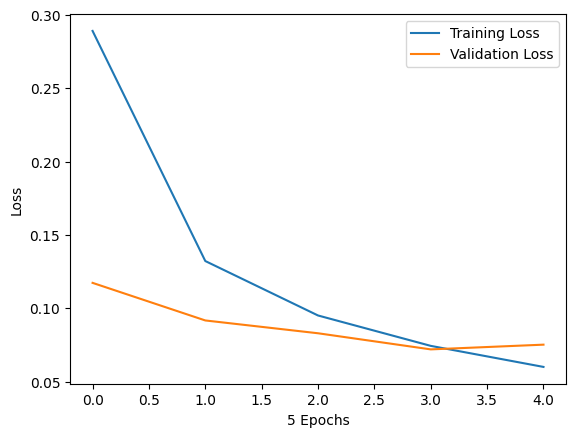

In [16]:
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('5 Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting: range (0.1 , 0.5)
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
# 10 epochs
history2 = model.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
    )

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8610 - loss: 0.4823 - val_accuracy: 0.9660 - val_loss: 0.1259
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9589 - loss: 0.1384 - val_accuracy: 0.9740 - val_loss: 0.0926
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9694 - loss: 0.0992 - val_accuracy: 0.9774 - val_loss: 0.0794
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9776 - loss: 0.0752 - val_accuracy: 0.9784 - val_loss: 0.0762
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9808 - loss: 0.0609 - val_accuracy: 0.9806 - val_loss: 0.0735
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9832 - loss: 0.0519 - val_accuracy: 0.9814 - val_loss: 0.0723
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9866 - loss: 0.0417 - val_accuracy: 0.9784 - val_loss: 0.0756
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9880 - loss: 0.0358 - 

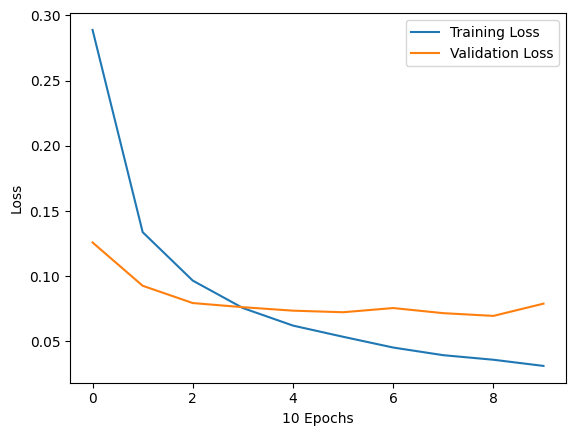

In [19]:
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('10 Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting: range (0.1 , 0.5)
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# 20 epochs
history3 = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val)
    )

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8658 - loss: 0.4708 - val_accuracy: 0.9618 - val_loss: 0.1273
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9572 - loss: 0.1427 - val_accuracy: 0.9734 - val_loss: 0.0874
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9706 - loss: 0.0954 - val_accuracy: 0.9734 - val_loss: 0.0836
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9759 - loss: 0.0776 - val_accuracy: 0.9776 - val_loss: 0.0759
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9816 - loss: 0.0587 - val_accuracy: 0.9794 - val_loss: 0.0743
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9833 - loss: 0.0518 - val_accuracy: 0.9816 - val_loss: 0.0678
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9871 - loss: 0.0408 - val_accuracy: 0.9824 - val_loss: 0.0598
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9896 - loss: 0.0327 -

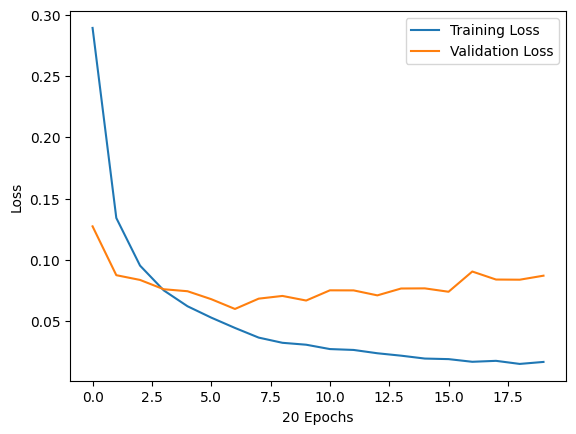

In [22]:
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('20 Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Task 4 — EarlyStopping Behavior Analysis



In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting: range (0.1 , 0.5)
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [24]:
callbacks = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
# 20 epochs
history3 = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks = callbacks
    )

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8615 - loss: 0.4769 - val_accuracy: 0.9678 - val_loss: 0.1226
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9577 - loss: 0.1429 - val_accuracy: 0.9720 - val_loss: 0.0983
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9711 - loss: 0.0949 - val_accuracy: 0.9768 - val_loss: 0.0754
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9776 - loss: 0.0720 - val_accuracy: 0.9798 - val_loss: 0.0739
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9822 - loss: 0.0584 - val_accuracy: 0.9782 - val_loss: 0.0711
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9835 - loss: 0.0522 - val_accuracy: 0.9808 - val_loss: 0.0653
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9865 - loss: 0.0418 - val_accuracy: 0.9788 - val_loss: 0.0719
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9871 - loss: 0.0384 -

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting: range (0.1 , 0.5)
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [26]:
# we set patience to 5
callbacks = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
# 20 epochs
history3 = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks = callbacks
    )

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8594 - loss: 0.4848 - val_accuracy: 0.9664 - val_loss: 0.1318
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9593 - loss: 0.1393 - val_accuracy: 0.9734 - val_loss: 0.0957
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9700 - loss: 0.0981 - val_accuracy: 0.9776 - val_loss: 0.0810
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9773 - loss: 0.0722 - val_accuracy: 0.9818 - val_loss: 0.0748
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9822 - loss: 0.0579 - val_accuracy: 0.9802 - val_loss: 0.0736
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9844 - loss: 0.0503 - val_accuracy: 0.9786 - val_loss: 0.0697
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9869 - loss: 0.0425 - val_accuracy: 0.9822 - val_loss: 0.0640
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9888 - loss: 0.0364 - 

### **Task 5 — Dropout Ablation Study**



no dropout

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [31]:
history_nodrop = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val)
    )

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8756 - loss: 0.4494 - val_accuracy: 0.9680 - val_loss: 0.1137
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9645 - loss: 0.1222 - val_accuracy: 0.9756 - val_loss: 0.0862
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9765 - loss: 0.0797 - val_accuracy: 0.9776 - val_loss: 0.0850
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9824 - loss: 0.0591 - val_accuracy: 0.9782 - val_loss: 0.0762
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9870 - loss: 0.0428 - val_accuracy: 0.9816 - val_loss: 0.0715
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9897 - loss: 0.0340 - val_accuracy: 0.9768 - val_loss: 0.0882
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9904 - loss: 0.0293 - val_accuracy: 0.9812 - val_loss: 0.0785
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9940 - loss: 0.0207 

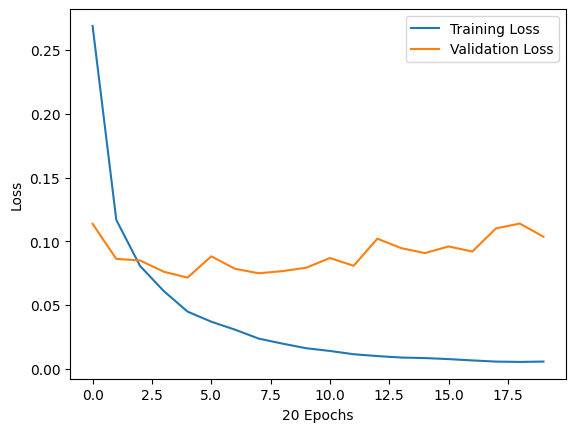

In [32]:
plt.plot(history_nodrop.history['loss'], label='Training Loss')
plt.plot(history_nodrop.history['val_loss'], label='Validation Loss')
plt.xlabel('20 Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

dropout = 0.1

In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting: range (0.1 , 0.5)
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
history_01drop = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val)
    )

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8585 - loss: 0.4860 - val_accuracy: 0.9668 - val_loss: 0.1214
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9589 - loss: 0.1429 - val_accuracy: 0.9742 - val_loss: 0.0929
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9688 - loss: 0.1003 - val_accuracy: 0.9764 - val_loss: 0.0836
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9770 - loss: 0.0718 - val_accuracy: 0.9780 - val_loss: 0.0741
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9819 - loss: 0.0578 - val_accuracy: 0.9782 - val_loss: 0.0750
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9836 - loss: 0.0509 - val_accuracy: 0.9762 - val_loss: 0.0781
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9871 - loss: 0.0427 - val_accuracy: 0.9802 - val_loss: 0.0695
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9870 - loss: 0.0381 - 

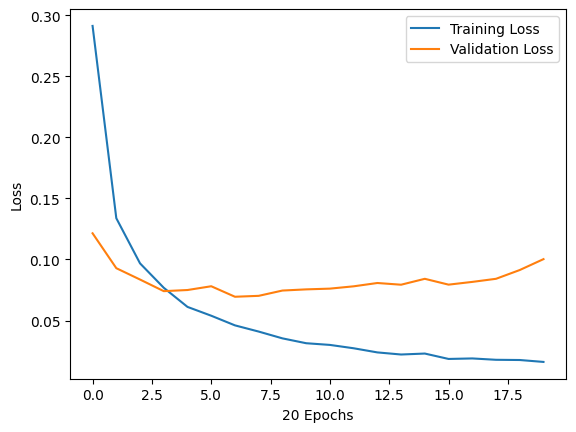

In [35]:
plt.plot(history_01drop.history['loss'], label='Training Loss')
plt.plot(history_01drop.history['val_loss'], label='Validation Loss')
plt.xlabel('20 Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

dropout = 0.3

In [36]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),   # prevent overfitting: range (0.1 , 0.5)
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [37]:
history_03drop = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val)
    )

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8403 - loss: 0.5441 - val_accuracy: 0.9646 - val_loss: 0.1234
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9450 - loss: 0.1809 - val_accuracy: 0.9728 - val_loss: 0.0944
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9601 - loss: 0.1319 - val_accuracy: 0.9754 - val_loss: 0.0822
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9666 - loss: 0.1076 - val_accuracy: 0.9796 - val_loss: 0.0726
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9704 - loss: 0.0951 - val_accuracy: 0.9790 - val_loss: 0.0738
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9752 - loss: 0.0823 - val_accuracy: 0.9792 - val_loss: 0.0735
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9747 - loss: 0.0778 - val_accuracy: 0.9796 - val_loss: 0.0694
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9787 - loss: 0.0668 - 

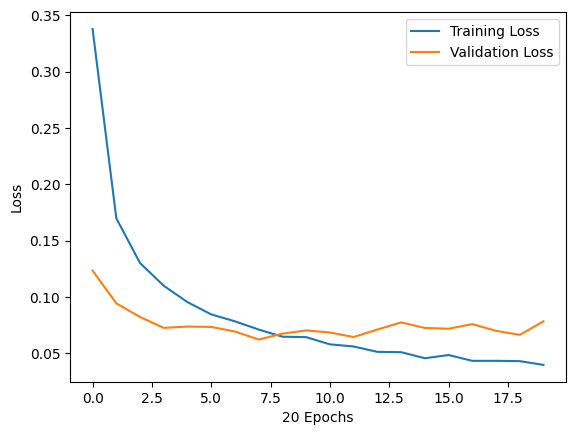

In [38]:
plt.plot(history_03drop.history['loss'], label='Training Loss')
plt.plot(history_03drop.history['val_loss'], label='Validation Loss')
plt.xlabel('20 Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Task 6 — L2 Regularization Experiment** (Selfstudy)


test value = 0.0001

In [40]:
kernel_regularizer=keras.regularizers.l2(0.0001)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu", kernel_regularizer= kernel_regularizer),
    keras.layers.Dropout(0.1),   # prevent overfitting: range (0.1 , 0.5)
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [41]:
history_reg1 = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val)
    )

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8608 - loss: 0.5032 - val_accuracy: 0.9664 - val_loss: 0.1491
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9566 - loss: 0.1696 - val_accuracy: 0.9762 - val_loss: 0.1214
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9701 - loss: 0.1329 - val_accuracy: 0.9766 - val_loss: 0.1183
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9757 - loss: 0.1159 - val_accuracy: 0.9782 - val_loss: 0.1126
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9783 - loss: 0.1084 - val_accuracy: 0.9804 - val_loss: 0.1103
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9803 - loss: 0.1009 - val_accuracy: 0.9800 - val_loss: 0.1042
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9815 - loss: 0.0958 - val_accuracy: 0.9796 - val_loss: 0.1134
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9826 - loss: 0.0949 

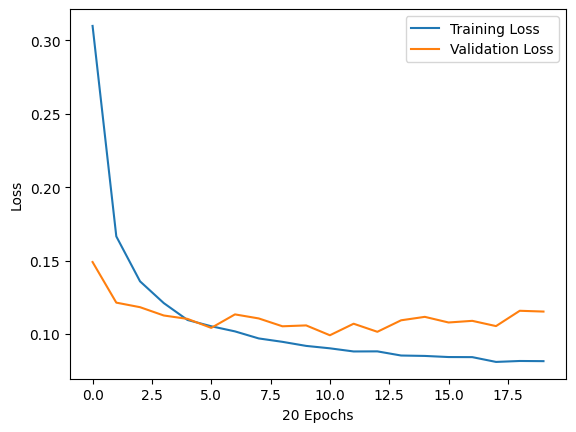

In [42]:
plt.plot(history_reg1.history['loss'], label='Training Loss')
plt.plot(history_reg1.history['val_loss'], label='Validation Loss')
plt.xlabel('20 Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

test value = 0.001

In [43]:
kernel_regularizer=keras.regularizers.l2(0.001)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu", kernel_regularizer= kernel_regularizer),
    keras.layers.Dropout(0.1),   # prevent overfitting: range (0.1 , 0.5)
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
history_reg2 = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val)
    )

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8613 - loss: 0.6174 - val_accuracy: 0.9678 - val_loss: 0.2261
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9485 - loss: 0.2674 - val_accuracy: 0.9728 - val_loss: 0.1911
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9571 - loss: 0.2319 - val_accuracy: 0.9712 - val_loss: 0.1864
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9611 - loss: 0.2097 - val_accuracy: 0.9694 - val_loss: 0.1869
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9643 - loss: 0.1973 - val_accuracy: 0.9742 - val_loss: 0.1708
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9665 - loss: 0.1891 - val_accuracy: 0.9714 - val_loss: 0.1744
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9679 - loss: 0.1834 - val_accuracy: 0.9760 - val_loss: 0.1630
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9685 - loss: 0.1794 -

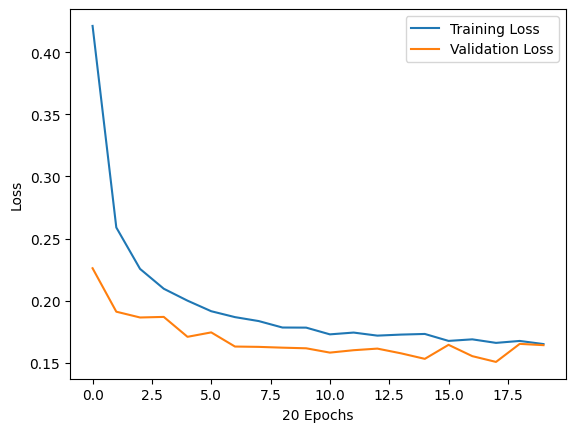

In [45]:
plt.plot(history_reg2.history['loss'], label='Training Loss')
plt.plot(history_reg2.history['val_loss'], label='Validation Loss')
plt.xlabel('20 Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

test value = 0.01

In [46]:
kernel_regularizer=keras.regularizers.l2(0.01)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu", kernel_regularizer= kernel_regularizer),
    keras.layers.Dropout(0.1),   # prevent overfitting: range (0.1 , 0.5)
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [47]:
history_reg3 = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val)
    )

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8419 - loss: 1.0426 - val_accuracy: 0.9456 - val_loss: 0.3745
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9195 - loss: 0.4416 - val_accuracy: 0.9518 - val_loss: 0.3265
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9278 - loss: 0.3965 - val_accuracy: 0.9550 - val_loss: 0.3188
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9348 - loss: 0.3683 - val_accuracy: 0.9546 - val_loss: 0.3184
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9383 - loss: 0.3571 - val_accuracy: 0.9584 - val_loss: 0.2910
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9396 - loss: 0.3438 - val_accuracy: 0.9632 - val_loss: 0.2798
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9406 - loss: 0.3397 - val_accuracy: 0.9620 - val_loss: 0.2673
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9438 - loss: 0.3247 - 

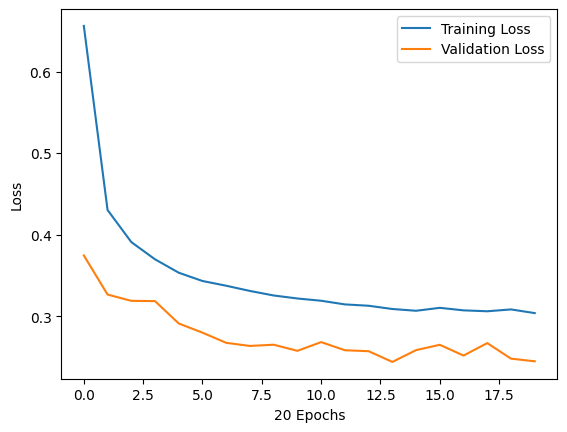

In [48]:
plt.plot(history_reg3.history['loss'], label='Training Loss')
plt.plot(history_reg3.history['val_loss'], label='Validation Loss')
plt.xlabel('20 Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Task 7 — Optimizer Comparison Challenge**


SGD

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting: range (0.1 , 0.5)
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
from tensorflow.keras.optimizers import SGD
optimizer = SGD(learning_rate=0.01)
model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [51]:
history_sgd = model.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
    )

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7121 - loss: 1.0746 - val_accuracy: 0.9254 - val_loss: 0.3102
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8884 - loss: 0.3921 - val_accuracy: 0.9370 - val_loss: 0.2480
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9055 - loss: 0.3302 - val_accuracy: 0.9436 - val_loss: 0.2198
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9197 - loss: 0.2870 - val_accuracy: 0.9474 - val_loss: 0.1991
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9273 - loss: 0.2573 - val_accuracy: 0.9510 - val_loss: 0.1829
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9301 - loss: 0.2428 - val_accuracy: 0.9552 - val_loss: 0.1688
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9368 - loss: 0.2221 - val_accuracy: 0.9586 - val_loss: 0.1589
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9414 - loss: 0.2062 - 

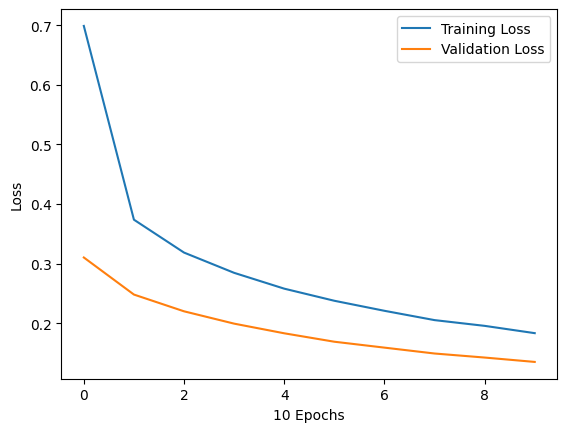

In [53]:
plt.plot(history_sgd.history['loss'], label='Training Loss')
plt.plot(history_sgd.history['val_loss'], label='Validation Loss')
plt.xlabel('10 Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

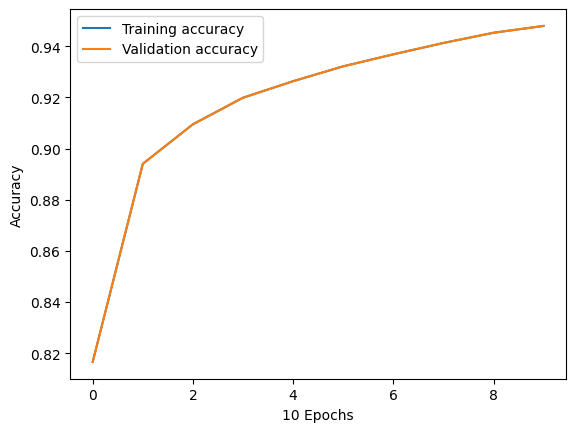

In [56]:
plt.plot(history_sgd.history['accuracy'], label='Training accuracy')
plt.plot(history_sgd.history['accuracy'], label='Validation accuracy')
plt.xlabel('10 Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

SGD with momentum

In [59]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting: range (0.1 , 0.5)
    keras.layers.Dense(10, activation="softmax")
])

In [60]:
optimizer = SGD(learning_rate=0.01,
                momentum=0.9)
model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [61]:
history_sgdmoment = model.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
    )

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8411 - loss: 0.5392 - val_accuracy: 0.9648 - val_loss: 0.1391
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9503 - loss: 0.1743 - val_accuracy: 0.9702 - val_loss: 0.1049
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9648 - loss: 0.1237 - val_accuracy: 0.9756 - val_loss: 0.0855
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9689 - loss: 0.1043 - val_accuracy: 0.9802 - val_loss: 0.0758
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9751 - loss: 0.0857 - val_accuracy: 0.9800 - val_loss: 0.0751
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9777 - loss: 0.0751 - val_accuracy: 0.9780 - val_loss: 0.0695
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9793 - loss: 0.0688 - val_accuracy: 0.9810 - val_loss: 0.0656
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9820 - loss: 0.0583 - 

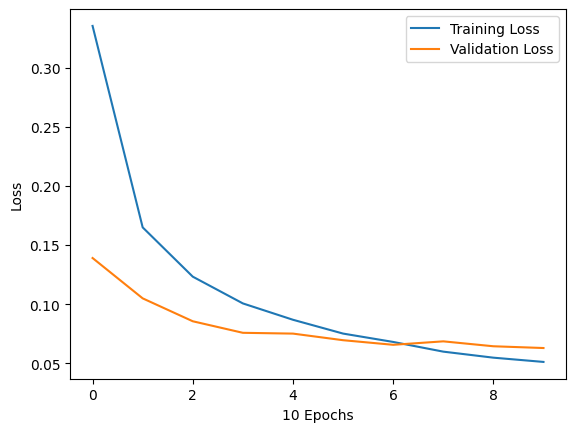

In [62]:
plt.plot(history_sgdmoment.history['loss'], label='Training Loss')
plt.plot(history_sgdmoment.history['val_loss'], label='Validation Loss')
plt.xlabel('10 Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

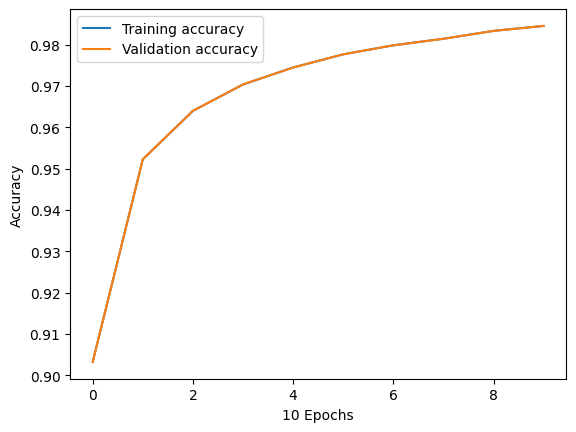

In [63]:
plt.plot(history_sgdmoment.history['accuracy'], label='Training accuracy')
plt.plot(history_sgdmoment.history['accuracy'], label='Validation accuracy')
plt.xlabel('10 Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Adam

In [64]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting: range (0.1 , 0.5)
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [66]:
history_adam = model.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
    )

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8617 - loss: 0.4807 - val_accuracy: 0.9692 - val_loss: 0.1243
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9561 - loss: 0.1471 - val_accuracy: 0.9748 - val_loss: 0.0895
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9710 - loss: 0.0952 - val_accuracy: 0.9756 - val_loss: 0.0829
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9770 - loss: 0.0741 - val_accuracy: 0.9774 - val_loss: 0.0800
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9814 - loss: 0.0596 - val_accuracy: 0.9794 - val_loss: 0.0741
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9846 - loss: 0.0497 - val_accuracy: 0.9790 - val_loss: 0.0813
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9865 - loss: 0.0431 - val_accuracy: 0.9812 - val_loss: 0.0735
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9870 - loss: 0.0382 

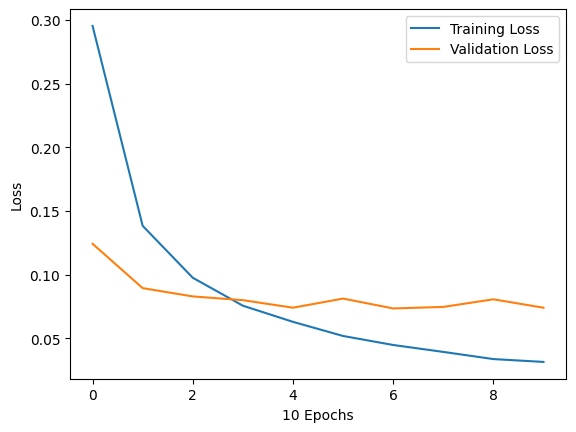

In [67]:
plt.plot(history_adam.history['loss'], label='Training Loss')
plt.plot(history_adam.history['val_loss'], label='Validation Loss')
plt.xlabel('10 Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

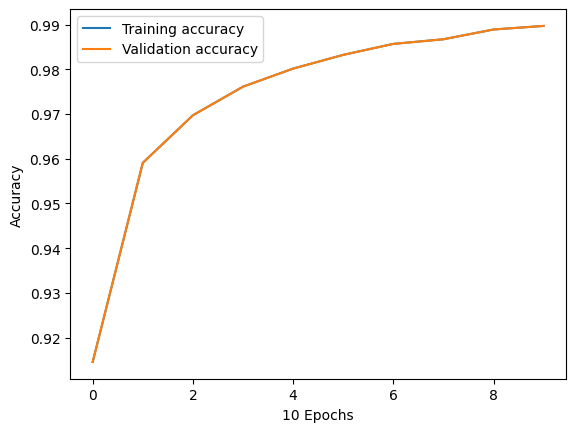

In [68]:
plt.plot(history_adam.history['accuracy'], label='Training accuracy')
plt.plot(history_adam.history['accuracy'], label='Validation accuracy')
plt.xlabel('10 Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

AdamW

In [69]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting: range (0.1 , 0.5)
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
model.compile(
    optimizer='adamw',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [71]:
history_adamw = model.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
    )

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8611 - loss: 0.4837 - val_accuracy: 0.9662 - val_loss: 0.1211
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9579 - loss: 0.1418 - val_accuracy: 0.9750 - val_loss: 0.0916
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9697 - loss: 0.0984 - val_accuracy: 0.9762 - val_loss: 0.0815
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9775 - loss: 0.0735 - val_accuracy: 0.9804 - val_loss: 0.0741
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9813 - loss: 0.0600 - val_accuracy: 0.9776 - val_loss: 0.0779
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9848 - loss: 0.0474 - val_accuracy: 0.9792 - val_loss: 0.0773
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9857 - loss: 0.0437 - val_accuracy: 0.9800 - val_loss: 0.0753
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9879 - loss: 0.0366 -

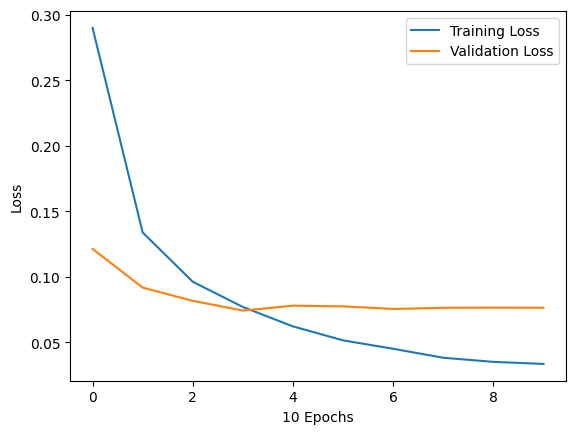

In [72]:
plt.plot(history_adamw.history['loss'], label='Training Loss')
plt.plot(history_adamw.history['val_loss'], label='Validation Loss')
plt.xlabel('10 Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

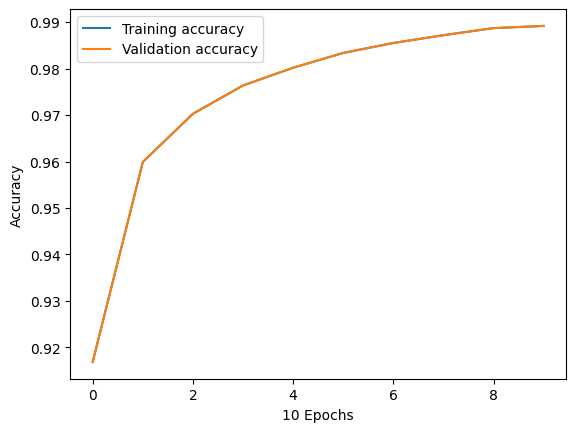

In [73]:
plt.plot(history_adamw.history['accuracy'], label='Training accuracy')
plt.plot(history_adamw.history['accuracy'], label='Validation accuracy')
plt.xlabel('10 Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **Task 8 — Batch Size & Gradient Noise Experiment**


batch 8

In [76]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting: range (0.1 , 0.5)
    keras.layers.Dense(10, activation="softmax")
])
model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [77]:
history_b8 = model.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=8,
    validation_data=(x_val, y_val)
    )

Epoch 1/10
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.8850 - loss: 0.3840 - val_accuracy: 0.9692 - val_loss: 0.1095
Epoch 2/10
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9633 - loss: 0.1207 - val_accuracy: 0.9742 - val_loss: 0.0908
Epoch 3/10
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9719 - loss: 0.0880 - val_accuracy: 0.9734 - val_loss: 0.0884
Epoch 4/10
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9781 - loss: 0.0696 - val_accuracy: 0.9816 - val_loss: 0.0678
Epoch 5/10
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9817 - loss: 0.0554 - val_accuracy: 0.9822 - val_loss: 0.0798
Epoch 6/10
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9841 - loss: 0.0477 - val_accuracy: 0.9814 - val_loss: 0.0789
Epoch 7/10
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9868 - loss: 0.0400 - val_accuracy: 0.9812 - val_loss: 0.0828
Epoch 8/10
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9866 - loss: 0

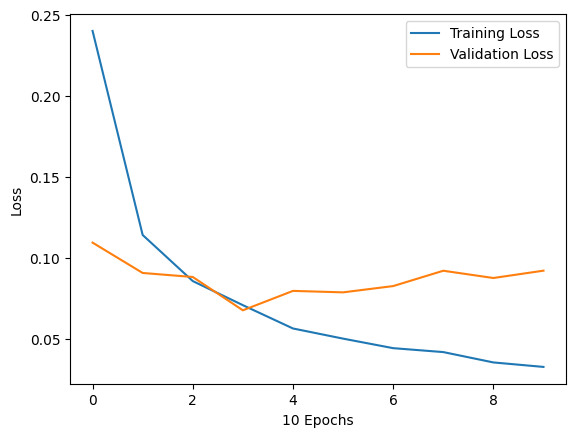

In [78]:
plt.plot(history_b8.history['loss'], label='Training Loss')
plt.plot(history_b8.history['val_loss'], label='Validation Loss')
plt.xlabel('10 Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

batch 32

In [80]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting: range (0.1 , 0.5)
    keras.layers.Dense(10, activation="softmax")
])
model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [81]:
history_b32 = model.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
    )

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8633 - loss: 0.4738 - val_accuracy: 0.9682 - val_loss: 0.1127
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9582 - loss: 0.1412 - val_accuracy: 0.9742 - val_loss: 0.0875
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9692 - loss: 0.0994 - val_accuracy: 0.9792 - val_loss: 0.0784
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9781 - loss: 0.0724 - val_accuracy: 0.9794 - val_loss: 0.0794
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9823 - loss: 0.0574 - val_accuracy: 0.9820 - val_loss: 0.0709
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9849 - loss: 0.0489 - val_accuracy: 0.9816 - val_loss: 0.0668
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9866 - loss: 0.0413 - val_accuracy: 0.9824 - val_loss: 0.0682
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9881 - loss: 0.0348 

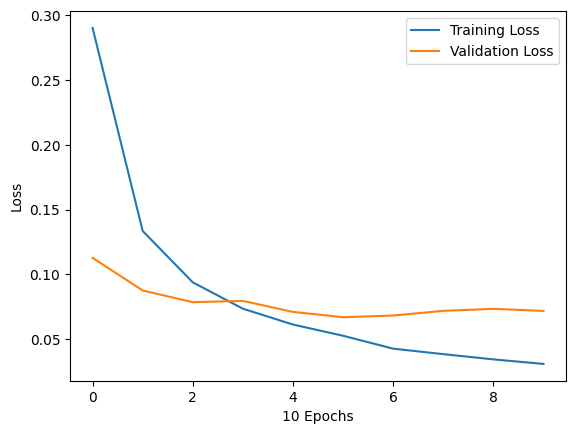

In [82]:
plt.plot(history_b32.history['loss'], label='Training Loss')
plt.plot(history_b32.history['val_loss'], label='Validation Loss')
plt.xlabel('10 Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

batch 128

In [84]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting: range (0.1 , 0.5)
    keras.layers.Dense(10, activation="softmax")
])
model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [85]:
history_b128 = model.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=128,
    validation_data=(x_val, y_val)
    )

Epoch 1/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8141 - loss: 0.6697 - val_accuracy: 0.9574 - val_loss: 0.1666
Epoch 2/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9424 - loss: 0.2023 - val_accuracy: 0.9672 - val_loss: 0.1160
Epoch 3/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9586 - loss: 0.1436 - val_accuracy: 0.9722 - val_loss: 0.0955
Epoch 4/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9674 - loss: 0.1120 - val_accuracy: 0.9762 - val_loss: 0.0870
Epoch 5/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9736 - loss: 0.0914 - val_accuracy: 0.9760 - val_loss: 0.0819
Epoch 6/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9785 - loss: 0.0735 - val_accuracy: 0.9782 - val_loss: 0.0754
Epoch 7/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9794 - loss: 0.0700 - val_accuracy: 0.9796 - val_loss: 0.0745
Epoch 8/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9827 - loss: 0.0572 - val_accuracy: 0.

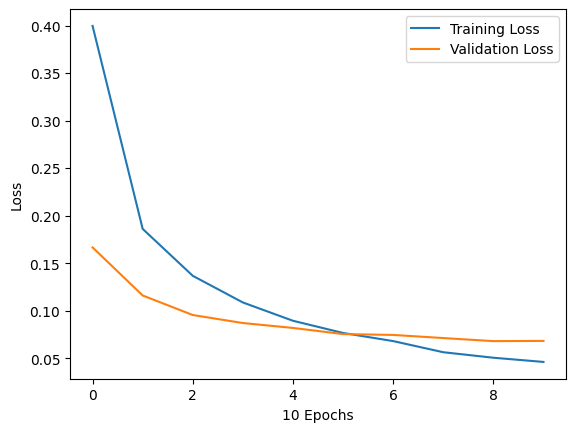

In [86]:
plt.plot(history_b128.history['loss'], label='Training Loss')
plt.plot(history_b128.history['val_loss'], label='Validation Loss')
plt.xlabel('10 Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Task 9 — Activation Function Swap (ReLU vs Tanh vs GELU)**


relu

In [89]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting: range (0.1 , 0.5)
    keras.layers.Dense(10, activation="softmax")
])
model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [90]:
history_relu = model.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
    )

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8635 - loss: 0.4808 - val_accuracy: 0.9666 - val_loss: 0.1155
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9597 - loss: 0.1386 - val_accuracy: 0.9736 - val_loss: 0.0868
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9703 - loss: 0.0982 - val_accuracy: 0.9784 - val_loss: 0.0792
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9772 - loss: 0.0730 - val_accuracy: 0.9780 - val_loss: 0.0753
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9822 - loss: 0.0596 - val_accuracy: 0.9784 - val_loss: 0.0674
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9850 - loss: 0.0474 - val_accuracy: 0.9768 - val_loss: 0.0803
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9858 - loss: 0.0429 - val_accuracy: 0.9798 - val_loss: 0.0712
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9890 - loss: 0.0339 - 

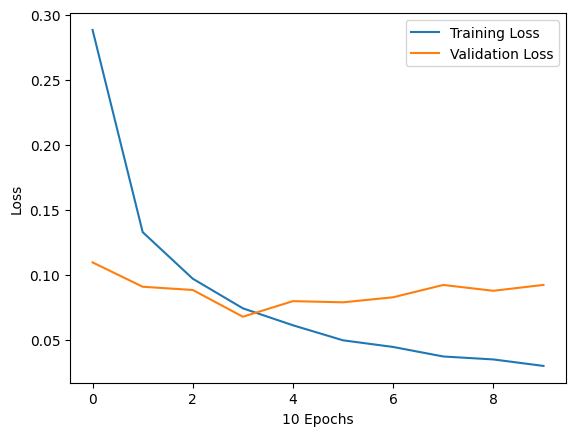

In [91]:
plt.plot(history_relu.history['loss'], label='Training Loss')
plt.plot(history_b8.history['val_loss'], label='Validation Loss')
plt.xlabel('10 Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

tanh

In [92]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="tanh"),
    keras.layers.Dropout(0.1),   # prevent overfitting: range (0.1 , 0.5)
    keras.layers.Dense(10, activation="softmax")
])
model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [93]:
history_tanh = model.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
    )

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8600 - loss: 0.4755 - val_accuracy: 0.9580 - val_loss: 0.1532
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9476 - loss: 0.1810 - val_accuracy: 0.9708 - val_loss: 0.1080
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9631 - loss: 0.1259 - val_accuracy: 0.9720 - val_loss: 0.0976
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9700 - loss: 0.0998 - val_accuracy: 0.9738 - val_loss: 0.0868
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9751 - loss: 0.0811 - val_accuracy: 0.9774 - val_loss: 0.0792
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9800 - loss: 0.0661 - val_accuracy: 0.9790 - val_loss: 0.0735
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9842 - loss: 0.0528 - val_accuracy: 0.9798 - val_loss: 0.0726
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9831 - loss: 0.0508 

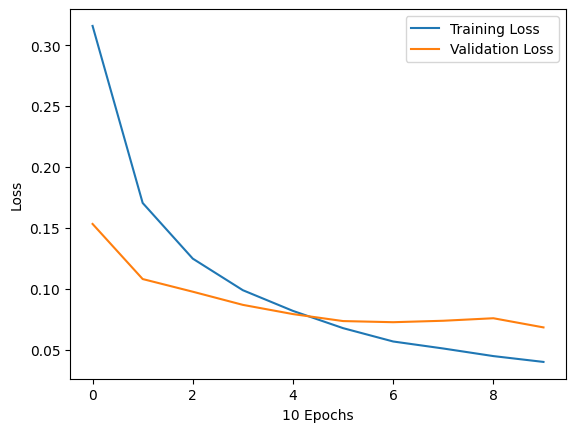

In [94]:
plt.plot(history_tanh.history['loss'], label='Training Loss')
plt.plot(history_tanh.history['val_loss'], label='Validation Loss')
plt.xlabel('10 Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

softsign

In [97]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="softsign"),
    keras.layers.Dropout(0.1),   # prevent overfitting: range (0.1 , 0.5)
    keras.layers.Dense(10, activation="softmax")
])
model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [98]:
history_softsign = model.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
    )

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8616 - loss: 0.5052 - val_accuracy: 0.9570 - val_loss: 0.1616
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9421 - loss: 0.1967 - val_accuracy: 0.9650 - val_loss: 0.1231
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9551 - loss: 0.1512 - val_accuracy: 0.9682 - val_loss: 0.1049
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9660 - loss: 0.1159 - val_accuracy: 0.9728 - val_loss: 0.0974
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9702 - loss: 0.0994 - val_accuracy: 0.9726 - val_loss: 0.0943
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9750 - loss: 0.0828 - val_accuracy: 0.9754 - val_loss: 0.0841
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9772 - loss: 0.0761 - val_accuracy: 0.9766 - val_loss: 0.0777
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9797 - loss: 0.0658 -

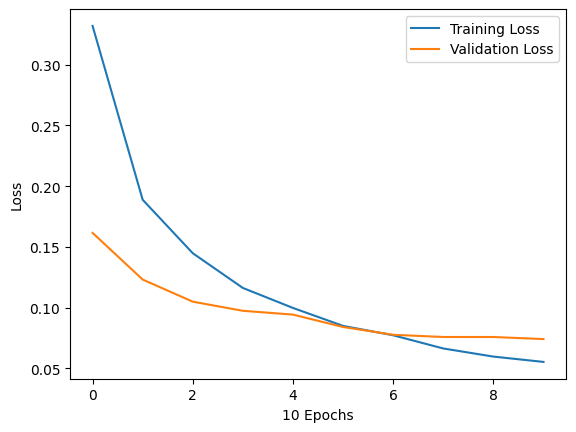

In [99]:
plt.plot(history_softsign.history['loss'], label='Training Loss')
plt.plot(history_softsign.history['val_loss'], label='Validation Loss')
plt.xlabel('10 Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

GELU

In [102]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="gelu"),
    keras.layers.Dropout(0.1),   # prevent overfitting: range (0.1 , 0.5)
    keras.layers.Dense(10, activation="softmax")
])
model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [104]:
history_gelu= model.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
    )

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8642 - loss: 0.4698 - val_accuracy: 0.9680 - val_loss: 0.1206
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9594 - loss: 0.1369 - val_accuracy: 0.9762 - val_loss: 0.0849
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9719 - loss: 0.0914 - val_accuracy: 0.9774 - val_loss: 0.0797
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9772 - loss: 0.0721 - val_accuracy: 0.9804 - val_loss: 0.0777
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9829 - loss: 0.0541 - val_accuracy: 0.9798 - val_loss: 0.0751
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9862 - loss: 0.0463 - val_accuracy: 0.9806 - val_loss: 0.0692
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9883 - loss: 0.0359 - val_accuracy: 0.9812 - val_loss: 0.0699
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9893 - loss: 0.0330 -

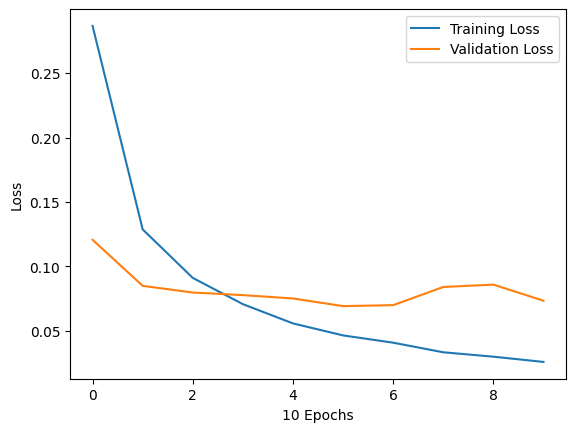

In [105]:
plt.plot(history_gelu.history['loss'], label='Training Loss')
plt.plot(history_gelu.history['val_loss'], label='Validation Loss')
plt.xlabel('10 Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Task 10 — Weight Inspection & Model Capacity Analysis**


In [106]:
w, b = model.layers[1].get_weights()
print(w.shape)

(784, 128)
